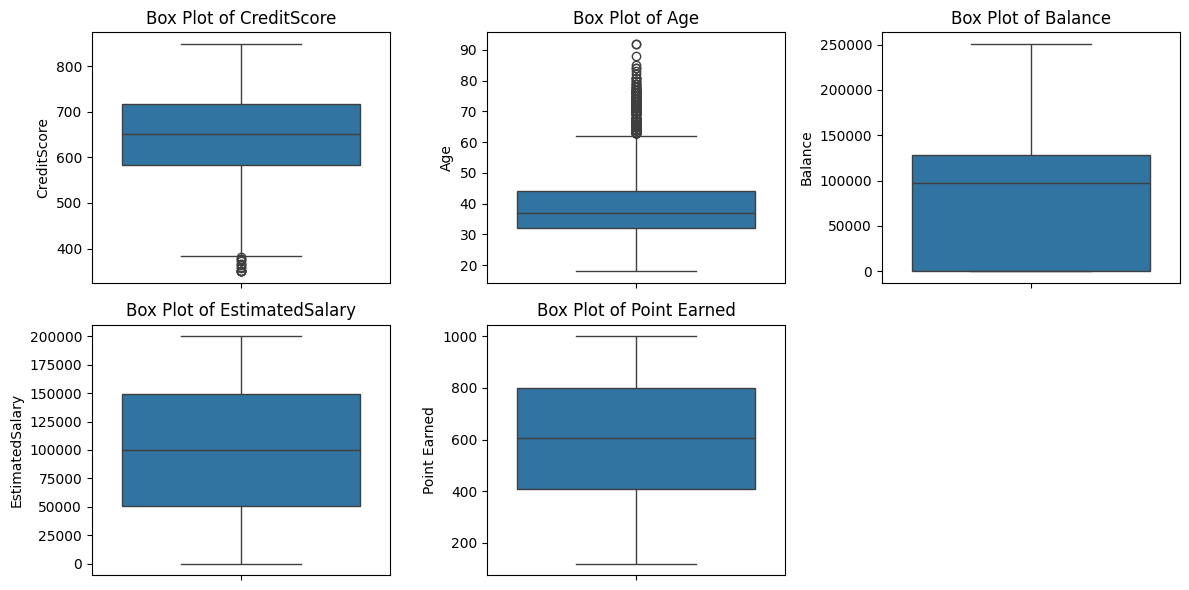

SVM Accuracy: Before Outlier Removal = 0.8075, After Outlier Removal = 0.8032
Random Forest Accuracy: Before Outlier Removal = 0.8050, After Outlier Removal = 0.7949


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Load the dataset
df = pd.read_csv("/content/Bank-Customer-Attrition-Insights-Data.csv")

# Select numerical columns for outlier detection
num_cols = ['CreditScore', 'Age', 'Balance', 'EstimatedSalary', 'Point Earned']

# Q1: Detect outliers using box plots
plt.figure(figsize=(12, 6))
for i, col in enumerate(num_cols, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(y=df[col])
    plt.title(f'Box Plot of {col}')
plt.tight_layout()
plt.show()

# Function to remove outliers using IQR
def remove_outliers(df, columns):
    df_clean = df.copy()
    for col in columns:
        Q1 = df_clean[col].quantile(0.25)
        Q3 = df_clean[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df_clean = df_clean[(df_clean[col] >= lower_bound) & (df_clean[col] <= upper_bound)]
    return df_clean

# Q2: Remove outliers
df_clean = remove_outliers(df, num_cols)

# Prepare data for training
features = ['CreditScore', 'Age', 'Balance', 'EstimatedSalary', 'Point Earned']
X = df[features]
X_clean = df_clean[features]
y = df['Exited']
y_clean = df_clean['Exited']

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train_clean, X_test_clean, y_train_clean, y_test_clean = train_test_split(X_clean, y_clean, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_train_clean = scaler.fit_transform(X_train_clean)
X_test_clean = scaler.transform(X_test_clean)

# Train SVM and RF models
models = {"SVM": SVC(), "Random Forest": RandomForestClassifier()}
results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)

    model.fit(X_train_clean, y_train_clean)
    y_pred_clean = model.predict(X_test_clean)
    acc_clean = accuracy_score(y_test_clean, y_pred_clean)

    results[name] = (acc, acc_clean)

# Q3: Analyze results
for model, (acc, acc_clean) in results.items():
    print(f"{model} Accuracy: Before Outlier Removal = {acc:.4f}, After Outlier Removal = {acc_clean:.4f}")